In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import sparse
from ripser import ripser
from persim import plot_diagrams
from persim import wasserstein, wasserstein_matching
from persim import bottleneck, bottleneck_matching

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import custom functions
from TDA_helper_fcns import load_data, plot_gests, sublevel_set_time_series_dist
from gen_all_pds import plot_ts_pd

In [3]:
tst = load_data(subjects=["05", "11", "30"])
#plot_gests("05", "3_0_2", tst, 1)

---

Check out Wasserstein and Bottleneck Lab and link below to Ripser docs

https://ripser.scikit-tda.org/notebooks/Lower%20Star%20Time%20Series.html

In [12]:
# arbitrarily selecting a modality
seq53 = tst["30"]["3_1_2"][:500, 0:5]
t = seq53[:, 0]
y = seq53[:, 2]
n = len(y)

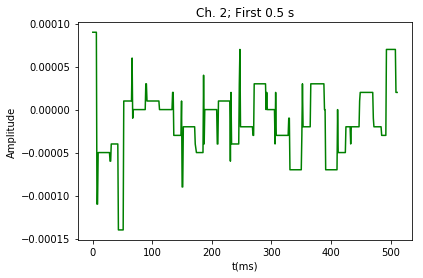

In [15]:
plt.plot(t, y, color="green")
plt.title("Ch. 2; First 0.5 s")
plt.xlabel("t(ms)")
plt.ylabel("Amplitude")
plt.savefig("./halfsec_s30g3")

In [ ]:
# compare each point of modality to its neighbor
# return an array of the max value of the two
maxY = np.maximum(y[0:-1], y[1:])
sigDat = np.concatenate((maxY, y)) # signal data
# sparse matrix indices
I = np.concatenate((np.arange(n-1), np.arange(n)))
J = np.concatenate((np.arange(1, n), np.arange(n)))

In [ ]:
#dstMat = sparse.coo_matrix((sigDat, (I, J)), shape=(n, n)).toarray()
dstMat = sparse.coo_matrix((sigDat, (I, J)), shape=(n, n)).tocsr()

In [ ]:
# compute persistence diagram
dgm0 = ripser(dstMat, maxdim=0, distance_matrix=True, metric="euclidian")['dgms'][0]

In [ ]:
allgrid = np.unique(dgm0.flatten())
allgrid = allgrid[allgrid < np.inf]
xs = np.unique(dgm0[:, 0]) # unique birth times
ys = np.unique(dgm0[:, 1]) # unique death times
ys = ys[ys < np.inf] # remove inf value

In [ ]:
#Plot the time series and the persistence diagram
plt.figure(figsize=(12, 6))
#ylims = [-1, 6.5]
plt.subplot(121)
plt.plot(t, y)
ax = plt.gca()
ax.set_yticks(allgrid)
ax.set_xticks([])
#plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plt.title("Subject 5; Gesture 3; Signal 1")
plt.xlabel("time (ms)")

plt.subplot(122)
ax = plt.gca()
ax.set_yticks(ys)
ax.set_xticks(xs)
#plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plot_diagrams(dgm0, size=50)
plt.title("Persistence Diagram")

plt.show()

In [ ]:
dgm0

In [ ]:
dgm0.flatten()

---

In [ ]:
def getLowerStarTimeSeriesD(x):
    N = x.size
    # Add edges between adjacent points in the time series, with the "distance" 
    # along the edge equal to the max value of the points it connects
    I = np.arange(N-1)
    J = np.arange(1, N)
    V = np.maximum(x[0:-1], x[1::])
    # Add vertex birth times along the diagonal of the distance matrix
    I = np.concatenate((I, np.arange(N)))
    J = np.concatenate((J, np.arange(N)))
    V = np.concatenate((V, x))
    #Create the sparse distance matrix
    D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
    return D

In [ ]:
Dy = getLowerStarTimeSeriesD(y)
Iy = ripser(Dy, distance_matrix=True, maxdim=0)['dgms'][0]

#plt.figure(figsize=(8, 4))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(y)
plt.subplot(122)
plot_diagrams(Iy)

#Remove point at infinity before bottleneck/wasserstein
Iy = Iy[np.isfinite(Iy[:, 1]), :]

#dw = wasserstein(Ix, Iy)
#print("Elapsed time Wasserstein: %.3g"%(time.time()-tic))
#tic = time.time()
#db = bottleneck(Ix, Iy)
#print("Elapsed time Bottleneck: %.3g"%(time.time()-tic))
#plt.title("Wasserstein = %.3g, Bottleneck=%.3g"%(dw, db))
plt.show()

In [ ]:
#Plot the time series and the persistence diagram
plt.figure(figsize=(12, 6))
#ylims = [-1, 6.5]
plt.subplot(121)
plt.plot(t, y)
ax = plt.gca()
#ax.set_yticks(allgrid)
#ax.set_xticks([])
#plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plt.title("Subject 5; Gesture 3; Signal 1")
plt.xlabel("time (ms)")

plt.subplot(122)
ax = plt.gca()
#ax.set_yticks(ys)
#ax.set_xticks(xs)
#plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plot_diagrams(dgm0, size=50)
plt.title("Persistence Diagram")

plt.show()